## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_dataset_df = mouse_metadata.merge(study_results, on="Mouse ID")
# Display the data table for preview
full_dataset_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice.
number_of_mice = full_dataset_df["Mouse ID"].nunique()
number_of_mice

249

In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_df = full_dataset_df[full_dataset_df.duplicated(["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
#Get index names for which column Mouse ID has value g989
indexNames = full_dataset_df[full_dataset_df['Mouse ID'] == 'g989' ].index
indexNames

Int64Index([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920], dtype='int64')

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
full_dataset_df.drop(indexNames, inplace=True)


In [6]:
# Check the number of mice in the clean DataFrame.
number_of_mice = full_dataset_df["Mouse ID"].nunique()
number_of_mice

248

## Summary Statistics

In [7]:
#Identifying the number of drug regimens for better understanding
number_of_regimens = full_dataset_df["Drug Regimen"].nunique()
number_of_regimens

10

In [8]:
#Printing drug regimens for better understanding
list_of_regimens = full_dataset_df["Drug Regimen"].unique()
print(list_of_regimens)

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


In [9]:
#Calculating summary statistics of tumor volume for each drug regimen

#Mean
regimen_mean = full_dataset_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
#Median
regimen_median =full_dataset_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
#Variance
regimen_var = full_dataset_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
#Standard Deviaton
regimen_std = full_dataset_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
#Standard Error of the Mean
regimen_sem = full_dataset_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]


#Create Summary Statistics of Tumor volume for each drug regimen
summary_stat_df = pd.DataFrame({"Mean" : regimen_mean, "Median" : regimen_median,
                                "Variance" : regimen_var, "Standard Deviation" : regimen_std, "SEM" : regimen_sem})
#Formatting
summary_stat_df.round(2)




,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

Text(0.5, 1.0, 'Numver of Mice Per Drug Regimen')

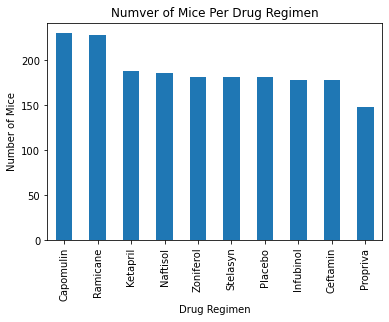

In [10]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 
drug_mice = full_dataset_df["Drug Regimen"].value_counts()

drug_mice.plot(kind = "bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Numver of Mice Per Drug Regimen")


## Note: this plot will be identical to the one that uses Pyplot

Text(0.5, 1.0, 'Number of Mice per Drug Regimen')

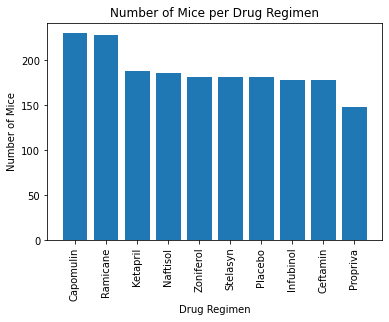

In [11]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.
plt.bar(drug_mice.index.values, drug_mice.values)
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Drug Regimen")
##  Note: this plot will be identical to the one that uses Pandas


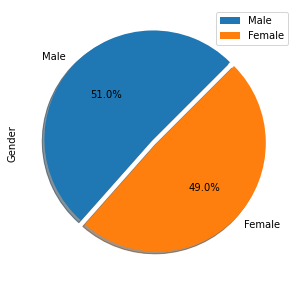

In [27]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice

pie_chart= pd.DataFrame({'Gender': [958, 922]},
                  index=["Male", "Female"])

explode = (0.05, 0)

plot = pie_chart.plot.pie(y = 'Gender', figsize=(5, 5), startangle = 45, autopct='%1.1f%%',
                          explode = explode, shadow = True)



## Note: this plot will be identical to the one that uses Pyplot

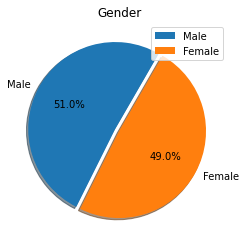

In [26]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice

#Counting the number of males and females in the original dataset
mice_sex_count = full_dataset_df["Sex"].value_counts()
mice_sex_count

#These will be the labels in our pie chart
gender = ["Male", "Female"]

#These will be the values in our pie chart
gender_count = [958, 922]

#Pie chart spacing
explode = (0.05, 0)

#Creating the pie chart
plt.pie(gender_count, explode = explode, labels = gender, autopct = "%1.1f%%", shadow = True, startangle = 60)
plt.legend(gender, loc = "upper right")
plt.title('Gender')
plt.show()







## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (latest) timepoint for each mouse
final_tumor_timepoint_df = full_dataset_df.groupby(["Mouse ID"]).max()[["Timepoint"]]

#Getting the tumor volume column from original dataset
final_tumor_volume_df = full_dataset_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]


# Merge above dataframes to get the tumor volume at the last timepoint
final_tumor_df = final_tumor_timepoint_df.merge(final_tumor_volume_df, on=["Mouse ID", "Timepoint"])
final_tumor_df






,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a262,45,Placebo,70.717621
3,a275,45,Ceftamin,62.999356
4,a366,30,Stelasyn,63.440686
...,...,...,...,...
243,z435,10,Propriva,48.710661
244,z578,45,Ramicane,30.638696
245,z581,45,Infubinol,62.754451
246,z795,45,Naftisol,65.741070


In [16]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#For loop: When the value in the "Drug Regimen" column equals the value of the drug iteration = x, 
#select the corresponding value in the "Tumor Volume (mm3)" column
for x in drug_list:
    drug_volume = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == x]["Tumor Volume (mm3)"]
    
    #Add the tumor volume values to the tumor_volume list
    tumor_volume_list.append(drug_volume)
    
    #Divide the values into quartiles
    quartiles = drug_volume.quantile([.25,.5,.75])
    
    #name the quartiles
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    #Find lower and upper bound
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #Identify potential outliers
    print(f"{x} potential outliers: {drug_volume.loc[(drug_volume < lower_bound) | (drug_volume > upper_bound) ]}")
    
    

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


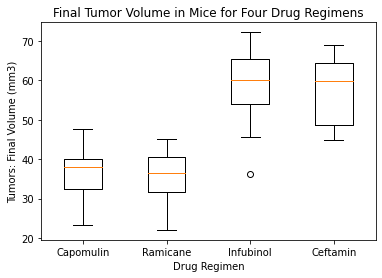

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume_list, labels = drug_list)
plt.ylabel("Tumors: Final Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.title("Final Tumor Volume in Mice for Four Drug Regimens")
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Size Over Time for Mouse Treated With Capomulin')

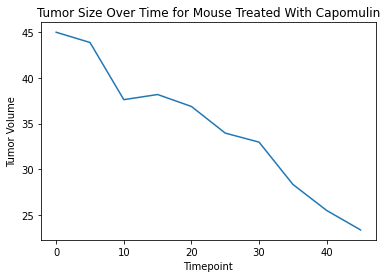

In [31]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin

#Identify mice treated with capomulin (there's only one)
capomulin = full_dataset_df.loc[full_dataset_df["Drug Regimen"] == "Capomulin"]
capomulin.head()

#Find all data on mouse named "s185"
mouse_s185 = capomulin.loc[capomulin["Mouse ID"] == "s185"]

#Plot line chart
plt.plot(mouse_s185["Timepoint"], mouse_s185["Tumor Volume (mm3)"])

plt.ylabel("Tumor Volume")
plt.xlabel("Timepoint")
plt.title("Tumor Size Over Time for Mouse Treated With Capomulin")


In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 

#Gather average tumor volume volume for mice in new dataframe
capomulin_scatter = capomulin.groupby(["Mouse ID"]).mean()
capomulin_scatter.head()

#select mouse weight and mean tumor volume columns
mouse_weight = capomulin_scatter.iloc[:,1]
tumor_volume_avg = capomulin_scatter.iloc[:,3]


## Correlation and Regression

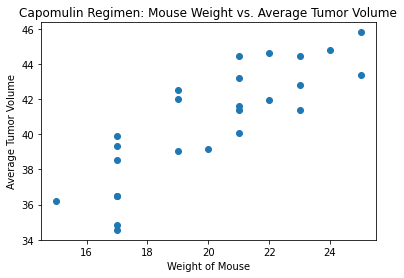

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.


plt.scatter(mouse_weight, tumor_volume_avg)
plt.xlabel("Weight of Mouse")
plt.ylabel("Average Tumor Volume")
plt.title("Capomulin Regimen: Mouse Weight vs. Average Tumor Volume")
plt.show()

In [37]:
correlation = st.pearsonr(mouse_weight, tumor_volume_avg)

print(f"The correlation coefficient is {round(correlation[0],2)}")

The correlation coefficient is 0.84
